# Run and Inspect `testbench_3D_Taehoon` Results

This notebook runs the Taehoon + Madison flow in Python and visualizes the generated raw result files.


In [7]:
from pathlib import Path
import sys

cwd = Path.cwd().resolve()
base = cwd if (cwd / 'pdn').exists() else cwd.parent
sys.path.insert(0, str(base))

EXCEL = base / '../3D_PDN_Taehoon+Madison/inputs/tb_inputs_RESNET_3D_22nm.xlsx'
OUTPUT = base / 'results_taehoon'
print('Project root:', base)
print('Excel:', EXCEL)
print('Output:', OUTPUT)


Project root: /Users/seungminwoo/Library/Mobile Documents/com~apple~CloudDocs/Professional/02-Workspace/02-PDN_Bakir/fromMadison/3DICE_PDN/MATLAB Code/3D_PDN_python
Excel: /Users/seungminwoo/Library/Mobile Documents/com~apple~CloudDocs/Professional/02-Workspace/02-PDN_Bakir/fromMadison/3DICE_PDN/MATLAB Code/3D_PDN_python/../3D_PDN_Taehoon+Madison/inputs/tb_inputs_RESNET_3D_22nm.xlsx
Output: /Users/seungminwoo/Library/Mobile Documents/com~apple~CloudDocs/Professional/02-Workspace/02-PDN_Bakir/fromMadison/3DICE_PDN/MATLAB Code/3D_PDN_python/results_taehoon




Die X size:    8.700e-03 m
Die Y size:    8.700e-03 m
Die area:    7.569e-05 m2
Power for Logic:    5.000e-01 W
Power for Memory:    5.000e-01 W
Total stack power:    1.000e+00 W
Chip TSV Nbundle:    1.000e+00
ubump pitch (x and y):    1.200e-04 m
ubump diameter:    8.000e-05 m
C4 diameter:    5.000e-05 m
C4 pitch (x and y):    2.000e-04 m
Number of metal layers: [4. 4.]
TSV diameter:    1.000e-06 m
Chip #1 could have 5329 power bumps
Chip #1 could have 5329 ground bumps
Chip #1 could have 1936 power c4 bumps
Chip #1 could have 1936 ground c4 bumps
Package has 1080 power bumps
Package has 1080 ground bumps
Chip #1 actually has 5329 power bumps
Chip #1 actually has 5329 ground bumps
Chip #1 actually has 1936 power c4 bumps
Chip #1 actually has 1936 ground c4 bumps
Chip #1, Die #1 has uniform power map, skipped
Chip #1, Die #2 has uniform power map, skipped
chip 1, BGA number: 1080.0
total power loss: 0.00
chip 1, BGA number: 1080.0
total power loss: 0.00
chip1 Die1 Max: 3.66
chip1 Die

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

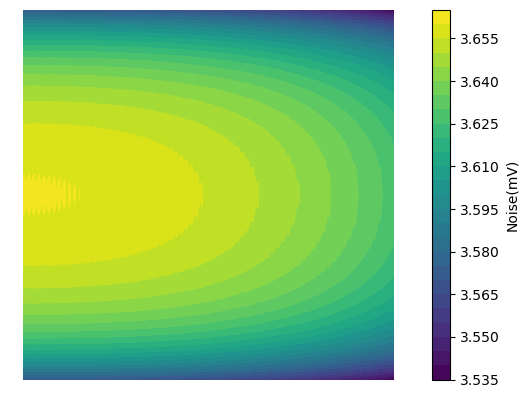

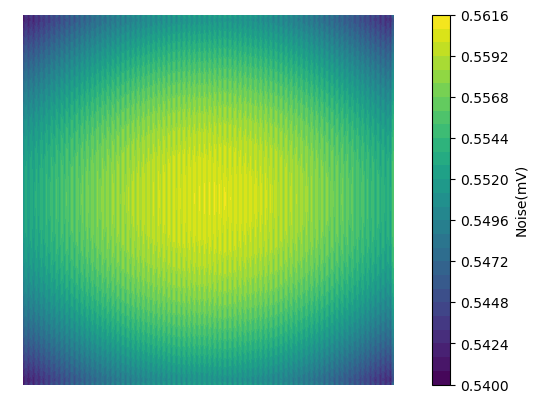

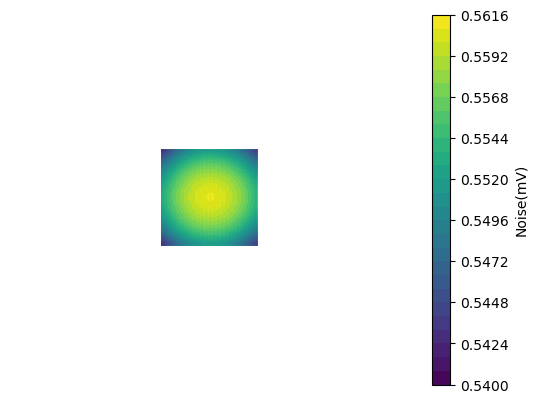

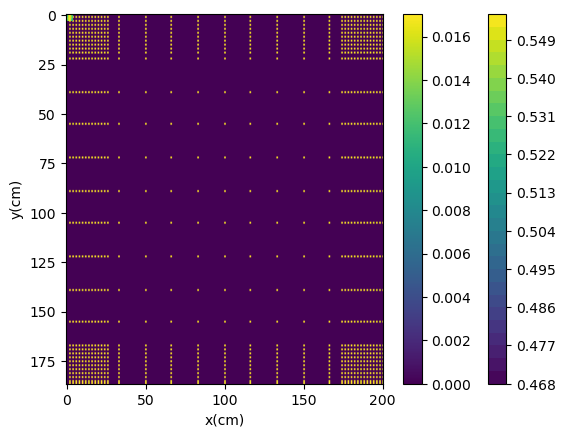

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from pdn.api import run_3d_taehoon

system, chip_list = run_3d_taehoon(str(EXCEL), output_dir=str(OUTPUT))


Die1 max noise (mV): 3.660395929057233
Die2 max noise (mV): 0.5608801891832224
Pkg max noise (mV): 0.5526429651620494


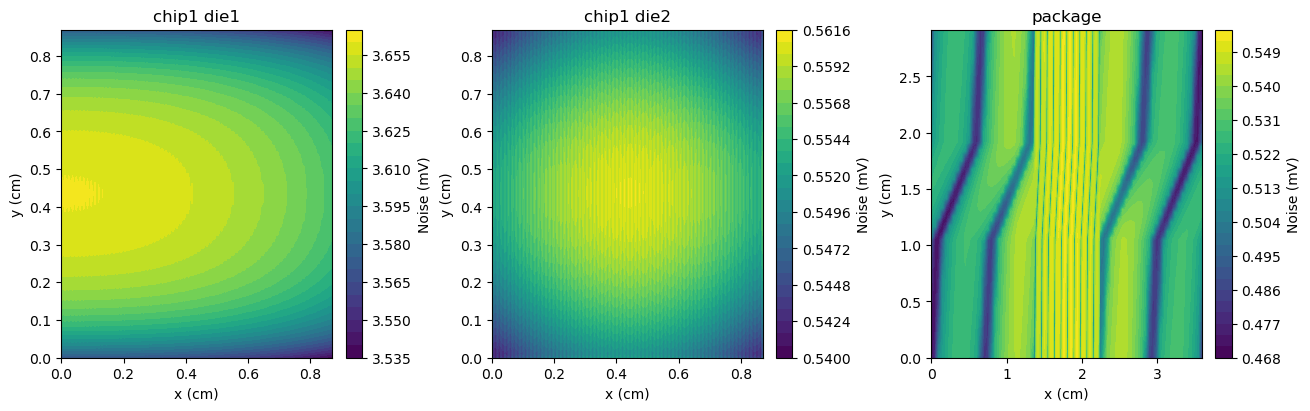

In [9]:
def load_frame(path, nx, ny):
    data = np.fromfile(path, dtype=np.float64)
    expected = nx * ny
    if data.size != expected:
        raise ValueError(f'Unexpected size in {path}: {data.size} (expected {expected})')
    return data.reshape((nx, ny), order='F').T

chip = chip_list[0]
die1 = load_frame(OUTPUT / 'chip1die1.txt', chip.Nx, chip.Ny)
die2 = load_frame(OUTPUT / 'chip1die2.txt', chip.Nx, chip.Ny)
pkg = load_frame(OUTPUT / 'pkg', system.pkg.Nx, system.pkg.Ny)

fig, ax = plt.subplots(1, 3, figsize=(13, 4), constrained_layout=True)
plots = [
    ('chip1 die1', chip.Xmesh, chip.Ymesh, die1),
    ('chip1 die2', chip.Xmesh, chip.Ymesh, die2),
    ('package', system.pkg.Xmesh, system.pkg.Ymesh, pkg),
]
for a, (title, xmesh, ymesh, data) in zip(ax, plots):
    im = a.contourf(np.asarray(xmesh) * 100, np.asarray(ymesh) * 100, np.abs(data) * 1000, 30)
    a.set_title(title)
    a.set_xlabel('x (cm)')
    a.set_ylabel('y (cm)')
    fig.colorbar(im, ax=a, label='Noise (mV)')

print('Die1 max noise (mV):', float(np.max(np.abs(die1)) * 1000))
print('Die2 max noise (mV):', float(np.max(np.abs(die2)) * 1000))
print('Pkg max noise (mV):', float(np.max(np.abs(pkg)) * 1000))
